Importando bibliotecas

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

Lendo arquivo

In [27]:
heart = pd.read_csv ('/content/drive/MyDrive/datasetExerc/heart.csv')
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [28]:
heart.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

2.2 Separando features e targets

In [29]:
X = heart [heart.columns [:-1]]
X

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [30]:
y = heart [heart.columns [-1:]]
y

,output
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


2.3 Imprimindo características do Dataframe

0


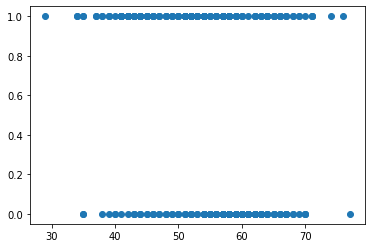

1


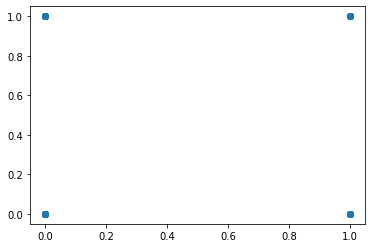

2


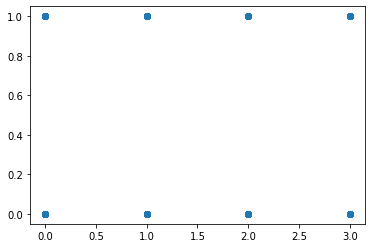

3


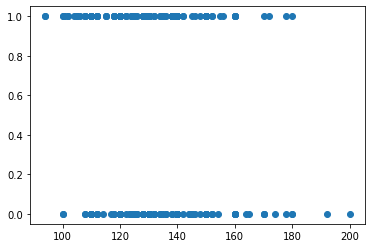

4


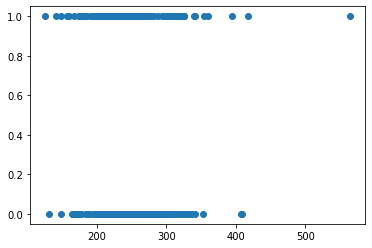

5


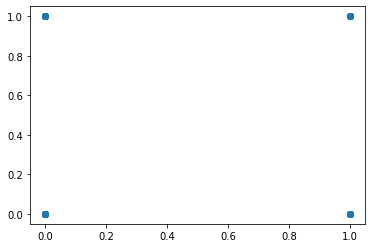

6


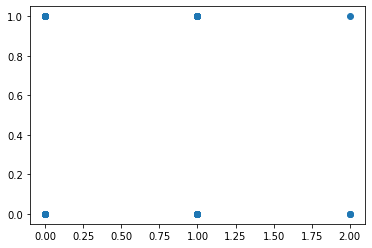

7


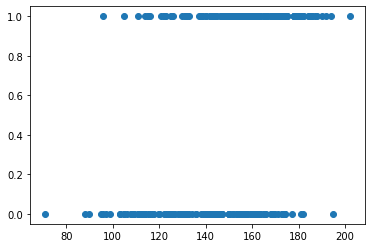

8


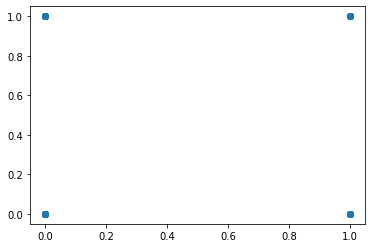

9


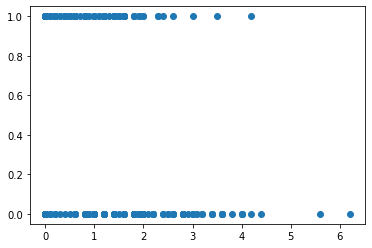

10


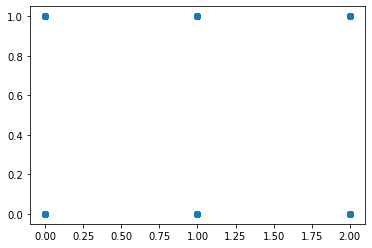

11


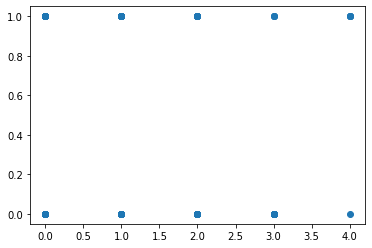

12


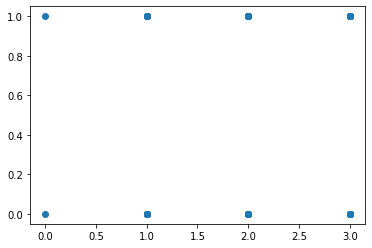

In [31]:
import matplotlib.pyplot as plt
for i in range (X.shape [1]):
  print (i)
  plt.scatter (X.iloc[:, i], y)
  plt.show()

2.4 Selecionando melhor distribuição de características

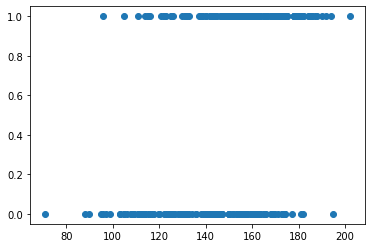

In [32]:
X7 = X.iloc [:, 7:8]
plt.scatter (X7, y)
plt.show()

2.5 Manipulando dados

In [33]:
from sklearn.linear_model import LogisticRegression
logmodelo = LogisticRegression(max_iter=1400,
                              random_state=5,
                              fit_intercept=True)

In [34]:
y = y.to_numpy().reshape((-1))
X = X.to_numpy()

logmodelo.fit(X, y)

LogisticRegression(max_iter=1400, random_state=5)

In [35]:
dlt = [ 3, 8, 40]

interc = logmodelo.intercept_ # Variavel W
modelo_dlt = np.linspace (interc + dlt[0], interc - dlt[0], 40)

lst_W = []
for interc_delta in modelo_dlt:
  logmodelo.intercept_ = interc_delta
  ypred = logmodelo.predict (X)
  mse = mean_squared_error (y, ypred)
  lst_W.append (mse)

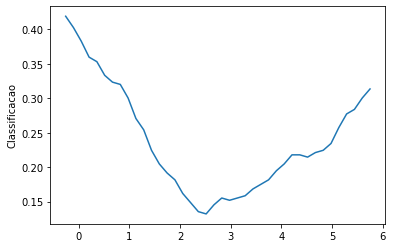

In [36]:
plt.plot (modelo_dlt, lst_W)
plt.ylabel ("Classificacao")
plt.show()